In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [2]:
os.chdir(r'D:\My py files\Data files\Data Sets')
df = pd.read_csv("moscow_apartment_listings.csv")
df.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

Scaled_X = sx.fit_transform(df[['house_age', 'rooms', 'footage', 'floor', 'repair']])
Scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

Scaled_y # It has become 2D due to scaling

array([[0.20529801],
       [0.15231788],
       [0.35761589],
       ...,
       [0.93377483],
       [0.79470199],
       [0.82317881]])

In [4]:
Scaled_y.reshape(df.shape[0],) # convert target column (i.e. price) into one dimensional array

array([0.20529801, 0.15231788, 0.35761589, ..., 0.93377483, 0.79470199,
       0.82317881])

In [5]:
Scaled_X

array([[0.32307692, 0.        , 0.15551839, 0.27027027, 0.66666667],
       [0.33076923, 0.        , 0.09197324, 0.02702703, 0.33333333],
       [0.33076923, 1.        , 0.38294314, 0.10810811, 0.33333333],
       ...,
       [0.14615385, 0.        , 0.42976589, 0.27027027, 1.        ],
       [0.14615385, 1.        , 0.53344482, 0.37837838, 0.        ],
       [0.7       , 1.        , 0.22742475, 0.        , 0.33333333]])

# Batch Gradient Descent

In [6]:
def batch_gradient_descent(X, y_actual, epochs, learning_rate = 0.01):
    
    no_of_features = X.shape[1]
    
    w = np.ones(shape = (no_of_features))
    b =0
    total_samples = X.shape[0]  # number of rows
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b  # w1 * house_age + w2 * rooms + w3 * footage + w4 * floor + w5 * repair + bias 
        
        w_grad = w_grad = -(5/total_samples)*(X.T.dot(y_actual-y_pred))
        b_grad = -(5/total_samples)*np.sum((y_actual-y_pred))
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_actual - y_pred)) # MSE
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list         

In [7]:
w_bgd, b_bgd, cost_bgd, cost_list_bgd, epoch_list_bgd = batch_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0]), 500)

In [8]:
w_bgd, b_bgd, cost_bgd

(array([ 0.62660156, -0.01277997,  0.83334696,  0.77576983,  0.29096107]),
 -0.24944515139258788,
 0.032393950622979)

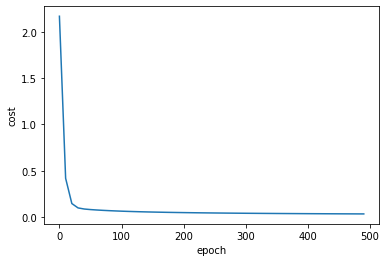

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_bgd,cost_list_bgd)

cost reduces as number of epoch increases

In [10]:
def predict(house_age, rooms, footage, floor, repair, w, b):
    Scaled_X = sx.transform([[house_age, rooms, footage, floor, repair]])[0]
    
    scaled_price = w[0] * Scaled_X[0] + w[1] * Scaled_X[1] + w[2] * Scaled_X[2] + w[3] * Scaled_X[3] + w[4] * Scaled_X[4] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [11]:
predict(43, 1, 35.6, 2, 2, w_bgd, b_bgd)

7201462.92774085

# Stochastic Gradient Descent 

In [17]:
def stochastic_gradient_descent(X, y_actual, epochs, learning_rate = 0.01):
    
    no_of_features = X.shape[1]
    
    w = np.ones(shape = (no_of_features))
    b =0
    total_samples = X.shape[0]  # number of rows
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        
        x_random = X[random_index]
        y_random = y_actual[random_index]
        
        y_pred = np.dot(w, x_random.T) + b  
        
        w_grad = -(5/total_samples)*(x_random.T.dot(y_random-y_pred))
        b_grad = -(5/total_samples)*(y_random-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(y_random - y_pred) 
        
        if i%1000==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list      

In [18]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0]), 500000)

In [19]:
w_sgd, b_sgd, cost_sgd

(array([0.78186318, 0.32877469, 0.76889468, 0.88438115, 0.63870512]),
 -0.6493925458314512,
 0.0711912740532812)

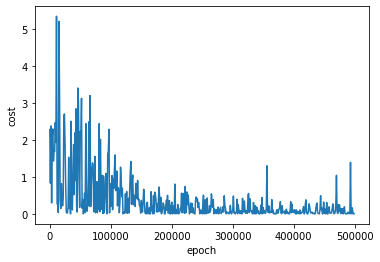

In [20]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [21]:
predict(43, 1, 35.6, 2, 2, w_sgd, b_sgd)

3642855.151678349